# APA Laboratori 5  - LDA/QDA/NBayes/RegLog       

In [1]:
# uncomment to install missing libraries
#install.packages('klaR')
#install.packages('mlbench')
# install.packages('e1071')
# install.packages('class')
# install.packages('kernlab')

In [2]:
options(repr.plot.width=6, repr.plot.height=6)

In [3]:
library(MASS) 

## Example 1: Visualizing and classifying wines with LDA and QDA

 We have the results of an analysis on wines grown in a region in Italy but derived from three different cultivars.
The analysis determined the quantities of 13 chemical constituents found in each of the three types of wines. 
The goal is to separate the three types of wines:

In [4]:
wine <- read.table("wine.data", sep=",", dec=".", header=FALSE)

dim(wine)

colnames(wine) <- c('Wine.type','Alcohol','Malic.acid','Ash',
                    'Alcalinity.of.ash','Magnesium','Total.phenols',
                    'Flavanoids','Nonflavanoid.phenols','Proanthocyanins',
                    'Color.intensity','Hue','OD280/OD315','Proline')

[1] 178  14

Clean up column names

In [5]:
colnames(wine) <- make.names(colnames(wine))

wine$Wine.type <- as.factor(wine$Wine.type)

summary(wine)

 Wine.type    Alcohol        Malic.acid         Ash        Alcalinity.of.ash
 1:59      Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 2:71      1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 3:48      Median :13.05   Median :1.865   Median :2.360   Median :19.50    
           Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
           3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
           Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total.phenols     Flavanoids    Nonflavanoid.phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   M

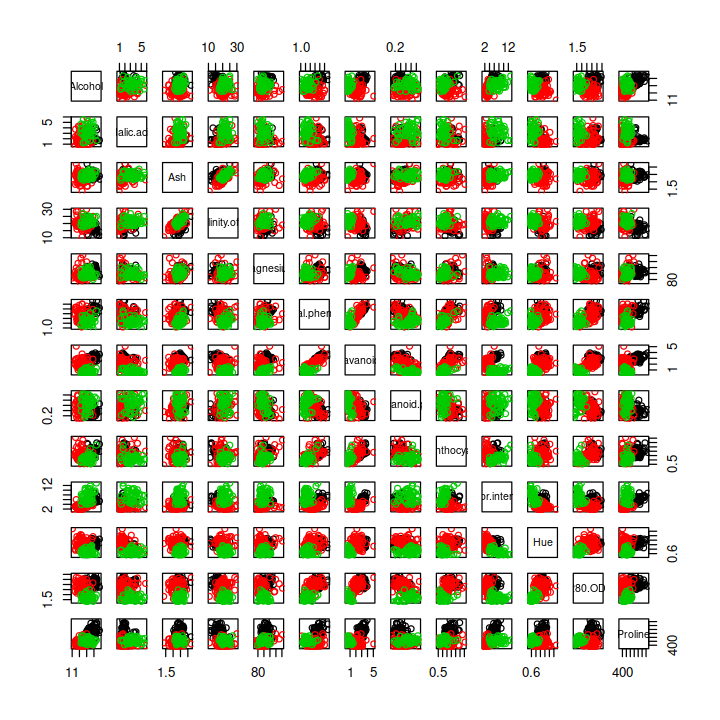

In [6]:
plot(subset(wine,select=-Wine.type),col=unclass(wine$Wine.type))

For this example let's practice a different call mode to lda(), using a formula; this is most useful
 when our data is in a dataframe format: 

In [7]:
lda.model <- lda (Wine.type ~ ., data = wine)

lda.model

Call:
lda(Wine.type ~ ., data = wine)

Prior probabilities of groups:
        1         2         3 
0.3314607 0.3988764 0.2696629 

Group means:
   Alcohol Malic.acid      Ash Alcalinity.of.ash Magnesium Total.phenols
1 13.74475   2.010678 2.455593          17.03729  106.3390      2.840169
2 12.27873   1.932676 2.244789          20.23803   94.5493      2.258873
3 13.15375   3.333750 2.437083          21.41667   99.3125      1.678750
  Flavanoids Nonflavanoid.phenols Proanthocyanins Color.intensity       Hue
1  2.9823729             0.290000        1.899322        5.528305 1.0620339
2  2.0808451             0.363662        1.630282        3.086620 1.0562817
3  0.7814583             0.447500        1.153542        7.396250 0.6827083
  OD280.OD315   Proline
1    3.157797 1115.7119
2    2.785352  519.5070
3    1.683542  629.8958

Coefficients of linear discriminants:
                              LD1           LD2
Alcohol              -0.403399781  0.8717930699
Malic.acid            0.165

We can see that neither Magnesium or Proline seem useful to separate the wines; while
 Flavanoids and Nonflavanoid.phenols do. Ash is mainly used in the LD2.

Plot the projected data in the first two LDs
 We can see that the discrimination is very good

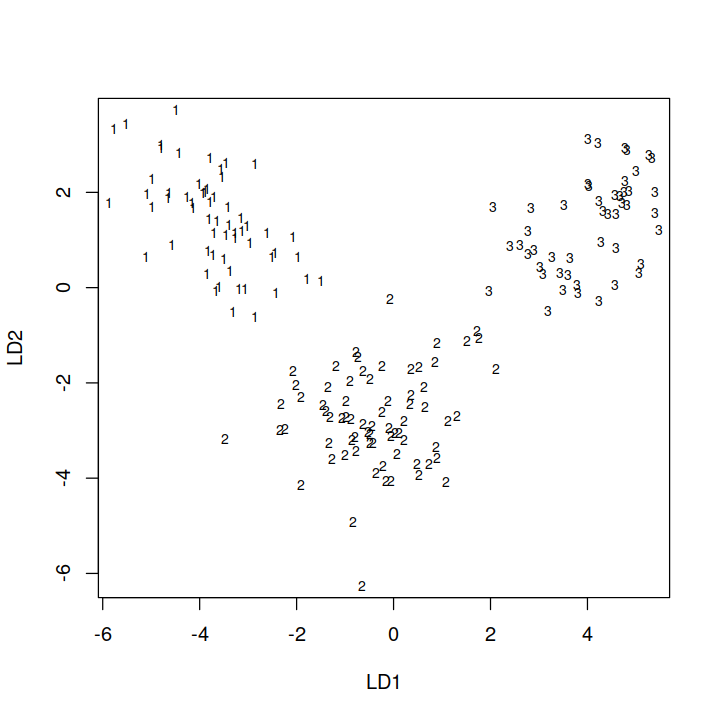

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
plot(lda.model)

alternatively, we can do it ourselves, with more control on color and text (wine number)

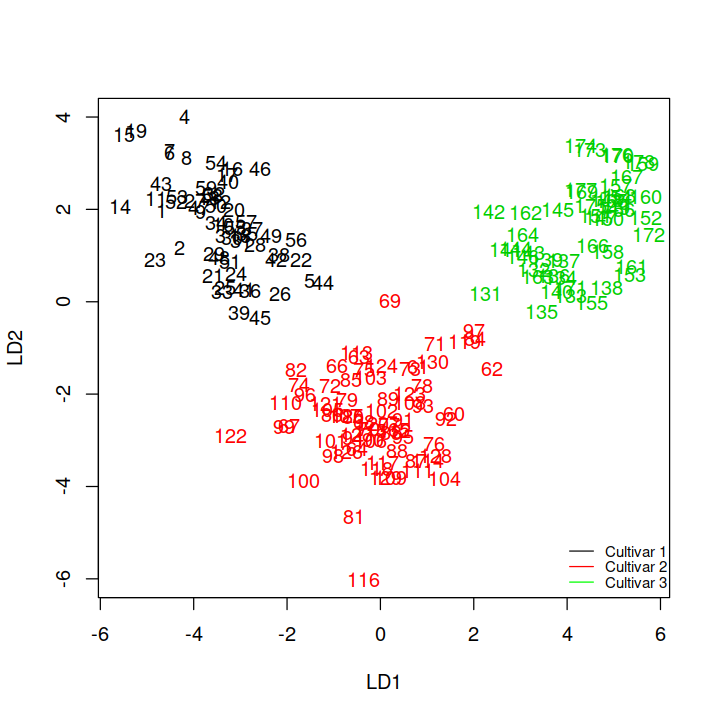

In [9]:
wine.pred <- predict(lda.model)
plot(wine.pred$x,type="n")
text(wine.pred$x,labels=as.character(rownames(wine.pred$x)),col=as.integer(wine$Wine.type))
legend('bottomright', c("Cultivar 1","Cultivar 2","Cultivar 3"), lty=1, col=c('black', 'red', 'green'), bty='n', cex=.75)

 If need be, we can add the (projected) means to the plot

[1] -3.422489  1.691674
[1] -0.07972623 -2.47265573
[1] 4.324737 1.578120


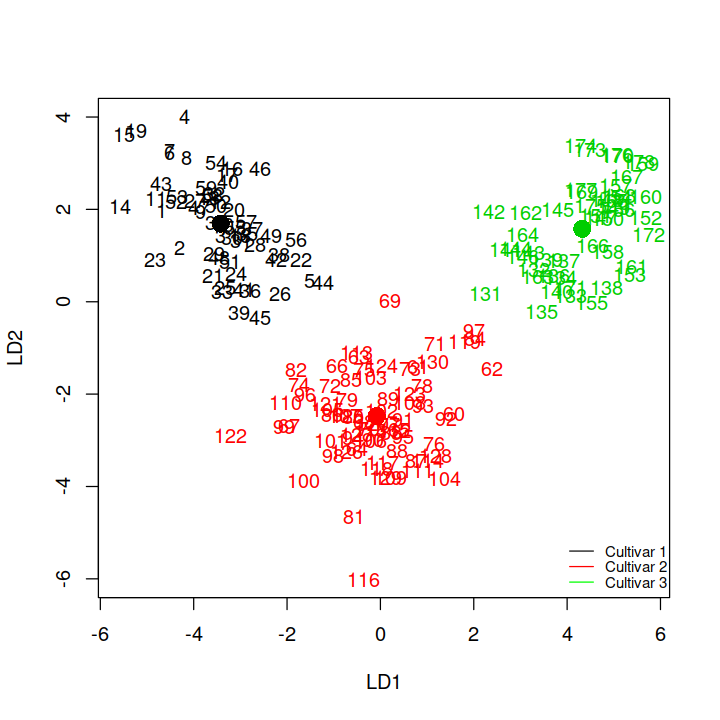

In [10]:
plot(wine.pred$x,type="n")
text(wine.pred$x,labels=as.character(rownames(wine.pred$x)),
     col=as.integer(wine$Wine.type))
legend('bottomright', c("Cultivar 1","Cultivar 2","Cultivar 3"), 
       lty=1, col=c('black', 'red', 'green'), bty='n', cex=.75)
plot.mean <- function (class)
{
  m1 <- mean(subset(wine.pred$x[,1],wine$Wine.type==class))
  m2 <- mean(subset(wine.pred$x[,2],wine$Wine.type==class))
  print(c(m1,m2))
  points(m1,m2,pch=16,cex=2,col=as.integer(class))
}

plot.mean ('1')
plot.mean ('2')
plot.mean ('3')

indeed classification is perfect

In [11]:
table(wine$Wine.type, wine.pred$class)

   
     1  2  3
  1 59  0  0
  2  0 71  0
  3  0  0 48

Let us switch to leave-one-out cross-validation

In [12]:
wine.predcv <- update(lda.model,CV=TRUE)
head(wine.predcv$posterior)
print(table(wine$Wine.type,wine.predcv$class))

,1,2,3
1,1.0000000,2.797215e-09,2.071649e-18
2,0.9999996,4.380414e-07,7.695679e-17
3,0.9999970,3.024498e-06,1.071531e-13
4,1.0000000,1.251896e-12,1.095841e-16
5,0.8667524,1.332472e-01,3.998307e-07
6,1.0000000,2.236339e-11,1.017938e-17


   
     1  2  3
  1 59  0  0
  2  1 69  1
  3  0  0 48


2 mistakes (on 178 observations): 1.12% error

Quadratic Discriminant Analysis is the same, replacing 'lda' by 'qda'

 problems may arise if for some class there are less (or equal) observations than dimensions
 (is not the case for the wine data)

In [13]:
qda.model <- qda (Wine.type ~ ., data = wine)

qda.model

Call:
qda(Wine.type ~ ., data = wine)

Prior probabilities of groups:
        1         2         3 
0.3314607 0.3988764 0.2696629 

Group means:
   Alcohol Malic.acid      Ash Alcalinity.of.ash Magnesium Total.phenols
1 13.74475   2.010678 2.455593          17.03729  106.3390      2.840169
2 12.27873   1.932676 2.244789          20.23803   94.5493      2.258873
3 13.15375   3.333750 2.437083          21.41667   99.3125      1.678750
  Flavanoids Nonflavanoid.phenols Proanthocyanins Color.intensity       Hue
1  2.9823729             0.290000        1.899322        5.528305 1.0620339
2  2.0808451             0.363662        1.630282        3.086620 1.0562817
3  0.7814583             0.447500        1.153542        7.396250 0.6827083
  OD280.OD315   Proline
1    3.157797 1115.7119
2    2.785352  519.5070
3    1.683542  629.8958

 There is no projection this time (because projection is a linear operator and the QDA boundaries are quadratic ones)

 but let's have a look at classification:

In [14]:
wine.pred <- predict(qda.model)
table(wine$Wine.type, wine.pred$class)

   
     1  2  3
  1 59  0  0
  2  1 70  0
  3  0  0 48

Let us switch to leave-one-out cross-validation

In [15]:
wine.predcv <- update(qda.model,CV=TRUE)
head(wine.predcv$posterior)

print(table(wine$Wine.type,wine.predcv$class))

,1,2,3
1,1.0000000,8.920821e-12,4.507563e-103
2,1.0000000,1.769818e-09,4.454565e-92
3,0.9999999,8.114981e-08,6.097512e-110
4,1.0000000,3.912182e-19,1.829719e-137
5,0.9995416,4.583964e-04,4.452314e-53
6,1.0000000,4.786107e-18,1.777360e-134


   
     1  2  3
  1 59  0  0
  2  1 70  0
  3  0  0 48


1 mistake (on 178 observations): 0.56% error

 it would be nice to ascertain which wine is the "stubborn" one: it is a wine of type '2' classified
as class '1'. Maybe there is something special with this wine ...

 In the event of numerical errors (insufficient number of observations per class), we can use 'rda'

In [16]:
library(klaR)
(rda.model <- rda (Wine.type ~ ., data = wine))

Call: 
rda(formula = Wine.type ~ ., data = wine)

Regularization parameters: 
      gamma      lambda 
1.000000000 0.001690939 

Prior probabilities of groups: 
        1         2         3 
0.3314607 0.3988764 0.2696629 

Misclassification rate: 
       apparent: 27.528 %
cross-validated: 26.95 %

**Look** at the gamma and lambda coefficients, and note gamma=0, lambda=1 corresponds to LDA

***

## Example 2: The Naïve Bayes classifier

In [17]:
library (e1071)

 Naive Bayes Classifier for Discrete Predictors: we use the 
 1984 United States Congressional Voting Records; 

 This data set includes votes for each of the U.S. House of Representatives Congressmen on 16 key votes
In origin they were nine different types of votes: 
     
* voted for, paired for, and announced for (these three simplified to yea or 'y'),
* voted against, paired against, and announced against (these three simplified to nay or 'n'), 
* voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known 
     (these three simplified to an 'unknown' disposition)

 The goal is to classify Congressmen as Republican or Democrat as a function of their voting profiles,
which is not immediate because in the US Congressmen have a large freedom of vote 
 (obviously linked to their party but also to their own feelings, interests and compromises with voters)

In [18]:
data (HouseVotes84, package="mlbench") 

add meaningful names to the votes

In [19]:
colnames(HouseVotes84) <- c("Class","handicapped.infants","water.project.sharing",
                            "budget.resolution","physician.fee.freeze",
                            "el.salvador.aid","religious.groups.in.schools",
                            "anti.satellite.ban","aid.to.nicaraguan.contras",
                            "mx.missile","immigration","synfuels.cutback",
                            "education.spending","superfund","crime","duty.free.exports",
                            "export.South.Africa")

summary(HouseVotes84)

        Class     handicapped.infants water.project.sharing budget.resolution
 democrat  :267   n   :236            n   :192              n   :171         
 republican:168   y   :187            y   :195              y   :253         
                  NA's: 12            NA's: 48              NA's: 11         
 physician.fee.freeze el.salvador.aid religious.groups.in.schools
 n   :247             n   :208        n   :152                   
 y   :177             y   :212        y   :272                   
 NA's: 11             NA's: 15        NA's: 11                   
 anti.satellite.ban aid.to.nicaraguan.contras mx.missile immigration
 n   :182           n   :178                  n   :206   n   :212   
 y   :239           y   :242                  y   :207   y   :216   
 NA's: 14           NA's: 15                  NA's: 22   NA's:  7   
 synfuels.cutback education.spending superfund   crime     duty.free.exports
 n   :264         n   :233           n   :201   n   :170   n   :233    

1 = democrat, 0 = republican
 Note "unknown dispositions" have been treated as missing values!

In [20]:
set.seed(1111)

N <- nrow(HouseVotes84)

 We first split the available data into learning and test sets, selecting randomly 2/3 and 1/3 of the data.
 
 We do this for a honest estimation of prediction performance

In [21]:
learn <- sample(1:N, round(2*N/3))

nlearn <- length(learn)
ntest <- N - nlearn

First we build a model using the learn data

In [22]:
model <- naiveBayes(Class ~ ., data = HouseVotes84[learn,])

 we get all the probabilities

In [23]:
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  democrat republican 
 0.6344828  0.3655172 

Conditional probabilities:
            handicapped.infants
Y                    n         y
  democrat   0.4034091 0.5965909
  republican 0.8076923 0.1923077

            water.project.sharing
Y                    n         y
  democrat   0.5000000 0.5000000
  republican 0.4468085 0.5531915

            budget.resolution
Y                    n         y
  democrat   0.1073446 0.8926554
  republican 0.8653846 0.1346154

            physician.fee.freeze
Y                     n          y
  democrat   0.94350282 0.05649718
  republican 0.01923077 0.98076923

            el.salvador.aid
Y                     n          y
  democrat   0.78160920 0.21839080
  republican 0.04854369 0.95145631

            religious.groups.in.schools
Y                     n          y
  democrat   0.50282486 0.49717514
  republican 

predict the outcome of the first 20 Congressmen

In [24]:
predict(model, HouseVotes84[1:20,-1]) 

[1] republican republican republican democrat   democrat   democrat  
 [7] republican republican republican democrat   republican republican
[13] democrat   democrat   republican republican democrat   democrat  
[19] republican democrat  
Levels: democrat republican

 same but displaying posterior probabilities

In [25]:
predict(model, HouseVotes84[1:20,-1], type = "raw") 

democrat,republican
1.247826e-07,9.999999e-01
6.159235e-08,9.999999e-01
7.532654e-03,9.924673e-01
9.992485e-01,7.515351e-04
9.480874e-01,5.191264e-02
6.952961e-01,3.047039e-01
1.506125e-04,9.998494e-01
9.107411e-06,9.999909e-01
9.672681e-08,9.999999e-01
1.000000e+00,1.965474e-11


compute now the apparent error

In [26]:
pred <- predict(model, HouseVotes84[learn,-1])

form and display confusion matrix & overall error

In [27]:
tab <- table(pred, HouseVotes84[learn,]$Class) 
tab
1 - sum(tab[row(tab)==col(tab)])/sum(tab)

            
pred         democrat republican
  democrat        164         10
  republican       20         96

[1] 0.1034483

compute the test (prediction) error

In [28]:
pred <- predict(model, newdata=HouseVotes84[-learn,-1])

 form and display confusion matrix & overall error

In [29]:
tab <- table(pred, HouseVotes84[-learn,]$Class) 
tab
1 - sum(tab[row(tab)==col(tab)])/sum(tab)

            
pred         democrat republican
  democrat         74          3
  republican        9         59

[1] 0.08275862

 note how most errors (9/12) correspond to democrats wrongly predicted as republicans

in the event of **empty empirical probabilities**, this is how we would setup Laplace correction (aka smoothing): 

In [30]:
model <- naiveBayes(Class ~ ., data = HouseVotes84[learn,], laplace = 1)

***

## Example 3: The kNN classifier

We are going to use the famous (Fisher's or Anderson's) Iris data set, which gives the measurements in centimeters
of the sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of Iris. 
 The species are Iris setosa, versicolor, and virginica.

In [31]:
library (class)
data(iris3)

 first we split a separate test set of relative size 30%

In [32]:
learn.inputs   <- rbind(iris3[1:35,,1], iris3[1:35,,2], iris3[1:35,,3])
learn.classes <- factor(c(rep("s",35), rep("c",35), rep("v",35)))

test.inputs  <- rbind(iris3[36:50,,1], iris3[36:50,,2], iris3[36:50,,3])
test.classes <- factor(c(rep("s",15), rep("c",15), rep("v",15)))

setup a kNN model with 3 neighbours
Notice there is no "learning" ... the data is the model (just test!)

In [33]:
myknn <- knn (learn.inputs, test.inputs, learn.classes, k = 3, prob=TRUE) 

tab <- table(myknn, test.classes) 
1 - sum(tab[row(tab)==col(tab)])/sum(tab)
tab

[1] 0

     test.classes
myknn  c  s  v
    c 15  0  0
    s  0 15  0
    v  0  0 15

rows are predictions, columns are true test targets

one can use the function 'knn1()' when k=1 (just one neighbour)

 How do we optimize k? One way is by using LOOCV

In [34]:
myknn.cv <- knn.cv (learn.inputs, learn.classes, k = 3)

tab <- table(myknn.cv, learn.classes) 
1 - sum(tab[row(tab)==col(tab)])/sum(tab)

[1] 0.05714286

aha! now you see that previous training error (0%) was a little bit optimistic

 Let's loop over k

In [35]:
set.seed (23)

neighbours <- c(1:sqrt(nrow(learn.inputs)))
errors <- matrix (nrow=length(neighbours), ncol=2)
colnames(errors) <- c("k","LOOCV error")

for (k in neighbours)
{
  myknn.cv <- knn.cv (learn.inputs, learn.classes, k = neighbours[k])
  
  # fill in no. of neighbours and LOO validation error
  errors[k, "k"] <- neighbours[k]
  
  tab <- table(myknn.cv, learn.classes)
  errors[k, "LOOCV error"] <- 1 - sum(tab[row(tab)==col(tab)])/sum(tab)
}

errors

k,LOOCV error
1,0.05714286
2,0.09523810
3,0.05714286
4,0.05714286
5,0.06666667
6,0.05714286
7,0.05714286
8,0.04761905
9,0.06666667
10,0.06666667


 It seems that k=8 is the best value.
 
Now we *refit* with k=8 and predict the test set

In [36]:
myknn <- knn (learn.inputs, test.inputs, learn.classes, k = 8, prob=TRUE) 


tab <- table(myknn, test.classes) 
1 - sum(tab[row(tab)==col(tab)])/sum(tab)
tab

[1] 0.02222222

     test.classes
myknn  c  s  v
    c 15  0  1
    s  0 15  0
    v  0  0 14

so our error is 2.2%

***

## Example 4: Logistic Regression using artificial data

 The goal of this example is to get acquainted with the call to glm()
 glm() is used to fit generalized linear models (of which both linear and logistic regression are particular cases)

 You may need to recall at this point the logistic regression model ...

 Let $x$ represent a single continuous predictor
 
 Let $y$ represent a class ('0' or '1'), with a probability of being 1 that is related linearly to the predictor
 via the logit funtion, that is $logit(p) = a*x + b$ (or $beta_1*x + beta_0$ if you prefer)

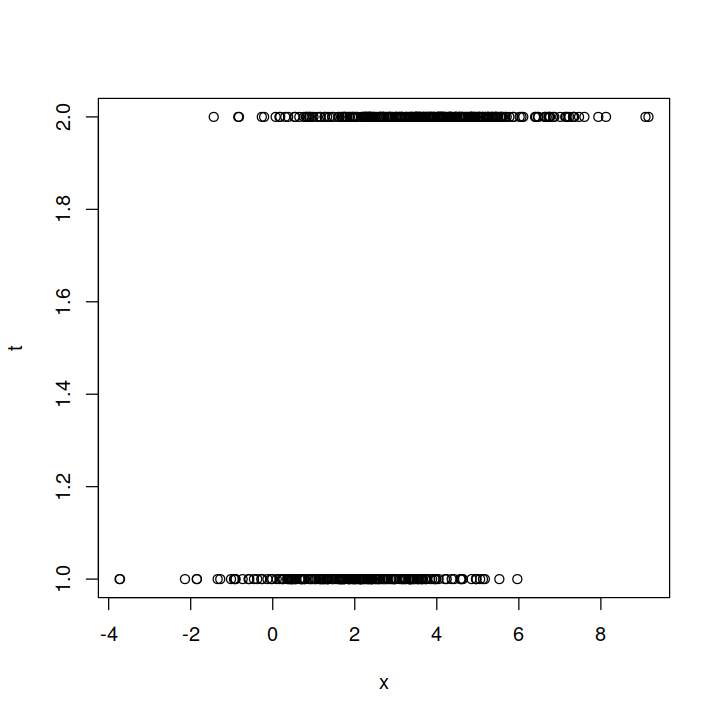

In [37]:
set.seed (1968)

N <- 500
x <- rnorm(n=N, mean=3, sd=2)     # generate the x_n (note x is a vector)
a <- 0.6 ; b <- -1.5              # this is the ground truth, which is unknown

p <- 1/(1+exp( -(a*x + b) ))      # generate the p_n (note p is a vector)
t <- rbinom(n=N,size=1,prob=p)
t <- as.factor(t)                 # generate the targets according to p

plot(x,t)

In [38]:
glm.res <- glm (t~x, family = binomial)

 look at the coefficients!
 
 'Intercept' is $b$, 'x' is $a$

In [39]:
summary(glm.res)


Call:
glm(formula = t ~ x, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1174  -1.0121   0.5127   0.9089   2.1940  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.44926    0.21178  -6.843 7.75e-12 ***
x            0.60011    0.06687   8.974  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 683.87  on 499  degrees of freedom
Residual deviance: 571.30  on 498  degrees of freedom
AIC: 575.3

Number of Fisher Scoring iterations: 4


 Obviously x is very significant (and the Intercept is always significant)

Therefore, our estimated model is
 $logit(p_n) = 0.60011*x_n -1.44926$
 quite close to the ground truth

 In general you get this as:
 
 - glm.res\$coefficients["x"] 
 - glm.res\$coefficients["(Intercept)"]

Interpretation of the coefficients:
 
- For a 1 unit increase in x, there is an increase in the odds for t by a factor of ...

In [40]:
exp(glm.res$coefficients["x"])

x 
1.82231

 that is almost doubling the odds (82.2% more)

***

## Example 5: Logistic regression for classifying spam mail

 This example will also illustrate how to change the 'cut point' for prediction, when there is an 
 interest in minimizing a particular source of errors

In [41]:
library(kernlab)  

data(spam)

Type ```help(spam)``` for some basic information about the dataset

We do some basic pre-processing

In [42]:
spam[,55:57] <- as.matrix(log10(spam[,55:57]+1))

spam2 <- spam[spam$george==0,]
spam2 <- spam2[spam2$num650==0,]
spam2 <- spam2[spam2$hp==0,]
spam2 <- spam2[spam2$hpl==0,]

george.vars <- 25:28
spam2 <- spam2[,-george.vars]

moneys.vars <- c(16,17,20,24)
spam3 <- data.frame( spam2[,-moneys.vars], spam2[,16]+spam2[,17]+spam2[,20]+spam2[,24])

colnames(spam3)[51] <- "about.money"

dim(spam3)

[1] 2999   51

In [43]:
set.seed (4321)
N <- nrow(spam3)                                                                                              
learn <- sample(1:N, round(0.67*N))
nlearn <- length(learn)
ntest <- N - nlearn

Fit a GLM in the learning data

In [44]:
spamM1 <- glm (type ~ ., data=spam3[learn,], family=binomial)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

 Simplify it using the AIC (this may take a while, since there are many variables)

In [45]:
suppressWarnings(spamM1.AIC <- step (spamM1))

Start:  AIC=940.25
type ~ make + address + all + num3d + our + over + remove + internet + 
    order + mail + receive + will + people + report + addresses + 
    email + you + your + font + num000 + lab + labs + telnet + 
    num857 + data + num415 + num85 + technology + num1999 + parts + 
    pm + direct + cs + meeting + original + project + re + edu + 
    table + conference + charSemicolon + charRoundbracket + charSquarebracket + 
    charExclamation + charDollar + charHash + capitalAve + capitalLong + 
    capitalTotal + about.money

                    Df Deviance     AIC
- font               1   838.27  938.27
- num1999            1   838.31  938.31
- order              1   838.31  938.31
- telnet             1   838.32  938.32
- charSquarebracket  1   838.33  938.33
- report             1   838.39  938.39
- all                1   838.41  938.41
- num415             1   838.46  938.46
- direct             1   838.58  938.58
- num857             1   838.62  938.62
- charHash      

do not worry about these warnings: they are fitted probabilities numerically very close to 0 or 1

 We define now a convenience function:

 'P' is a parameter; whenever our filter assigns spam with probability at least P then we predict spam

In [46]:
spam.accs <- function (P=0.5)
{
  ## Compute accuracy in learning data
  
  spamM1.AICpred <- NULL
  spamM1.AICpred[spamM1.AIC$fitted.values<P] <- 0
  spamM1.AICpred[spamM1.AIC$fitted.values>=P] <- 1
  
  spamM1.AICpred <- factor(spamM1.AICpred, labels=c("nonspam","spam"))
  
  print(M1.TRtable <- table(Truth=spam3[learn,]$type,Pred=spamM1.AICpred))
  
  print(100*(1-sum(diag(M1.TRtable))/nlearn))
  
  ## Compute accuracy in test data
  
  gl1t <- predict(spamM1.AIC, newdata=spam3[-learn,],type="response")
  gl1predt <- NULL
  gl1predt[gl1t<P] <- 0
  gl1predt[gl1t>=P] <- 1
  
  gl1predt <- factor(gl1predt, labels=c("nonspam","spam"))
  
  print(M1.TEtable <- table(Truth=spam3[-learn,]$type,Pred=gl1predt))
  
  print(100*(1-sum(diag(M1.TEtable))/ntest))
}

spam.accs()

         Pred
Truth     nonspam spam
  nonspam     792   81
  spam         64 1072
[1] 7.217521
         Pred
Truth     nonspam spam
  nonspam     357   42
  spam         28  563
[1] 7.070707


 gives 7.21% TRAINING ERROR and 7.07% TESTING ERROR

 Although the errors are quite low still one could argue that we should try to lower the probability of predicting spam when it is not
 We can do this (at the expense of increasing the converse probability) by:

In [47]:
spam.accs(0.7)

         Pred
Truth     nonspam spam
  nonspam     821   52
  spam        142  994
[1] 9.656546
         Pred
Truth     nonspam spam
  nonspam     372   27
  spam         75  516
[1] 10.30303


 gives 9.66% TRAINING ERROR and 10.3% TESTING ERROR

 So we get a much better spam filter; notice that the filter has a very low probability of 
predicting spam when it is not (which is the delicate case), of about 6.77%